Realizzare un notebook con le seguenti informazioni:

In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. L'elenco dei comuni che hanno un'area inferiore ai 10 kmq: visualizzare il numero, l'elenco e la mappa con tutti i comuni colorati in verde (trasparente) e bordati di nero

In [4]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/Com01012021_g')

In [5]:
comuni['Shape_Area']=comuni['Shape_Area']/10000

In [ ]:
comuni_10 = comuni[comuni['Shape_Area']<1000]
comuni_10

In [7]:
comuni_10_lombardia = comuni_10[comuni_10['COD_REG']==3]
comuni_10_lombardia

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1448,1,3,12,0,12,12001,012001,Agra,None,0,6996.108320,294.238907,"POLYGON ((482802.662 5097733.142, 482784.662 5..."
1449,1,3,12,0,12,12002,012002,Albizzate,None,0,9255.748026,381.383130,"POLYGON ((485235.221 5064709.066, 485545.361 5..."
1453,1,3,12,0,12,12006,012006,Azzate,None,0,11761.330818,453.647093,"POLYGON ((483900.127 5071449.880, 484020.211 5..."
1454,1,3,12,0,12,12007,012007,Azzio,None,0,7602.953671,217.279762,"POLYGON ((477914.331 5082436.678, 477696.259 5..."
1455,1,3,12,0,12,12008,012008,Barasso,None,0,10877.705348,387.266945,"POLYGON ((481124.582 5079579.276, 481862.732 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,1,3,108,0,108,108048,108048,Verano Brianza,None,0,9171.724083,366.786214,"POLYGON ((517613.394 5060787.396, 518293.122 5..."
7739,1,3,108,0,108,108049,108049,Villasanta,None,0,9629.121636,464.512162,"POLYGON ((523356.646 5052024.704, 523490.961 5..."
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,583.474963,"POLYGON ((535742.586 5052473.474, 535839.585 5..."
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,480.779355,"POLYGON ((530927.622 5047008.514, 530890.358 5..."


In [8]:
comuni_10_lombardia['Shape_Area'].count()

709

In [ ]:
ax = comuni_10_lombardia.to_crs(epsg=3857).plot(figsize=(18, 18), linewidth=2, facecolor='green', edgecolor='k', alpha=0.5)
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.

2. L'elenco dei comuni che hanno un'area inferiore ai 10 kmq e che si trovano all'interno di un parco: visualizzare il numero, l'elenco e la mappa  con tutti i comuni colorati in verde (trasparente) e bordati di nero. Visualizzare anche i parchi

In [9]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Parchi_regionali_e_nazionali_polygon.zip')

In [10]:
comuni_parco = comuni_10[comuni_10.intersects(parchi.geometry.squeeze().unary_union)]
comuni_parco

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
442,1,1,3,0,3,3091,003091,Marano Ticino,None,0,14517.515987,776.273408,"POLYGON ((473628.521 5053491.974, 473701.044 5..."
472,1,1,3,0,3,3144,003144,Terdobbiate,None,0,12721.520392,776.035412,"POLYGON ((476372.150 5026656.666, 476653.648 5..."
1454,1,3,12,0,12,12007,012007,Azzio,None,0,7602.953671,217.279762,"POLYGON ((477914.331 5082436.678, 477696.259 5..."
1455,1,3,12,0,12,12008,012008,Barasso,None,0,10877.705348,387.266945,"POLYGON ((481124.582 5079579.276, 481862.732 5..."
1457,1,3,12,0,12,12010,012010,Bedero Valcuvia,None,0,7365.876080,286.517684,"POLYGON ((484765.337 5085237.234, 484983.273 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,1,3,108,0,108,108043,108043,Triuggio,None,0,13806.322570,816.127146,"POLYGON ((521843.043 5059181.585, 521821.278 5..."
7736,1,3,108,0,108,108046,108046,Vedano al Lambro,None,0,6424.406511,207.812015,"POLYGON ((521763.469 5052046.216, 521702.783 5..."
7737,1,3,108,0,108,108047,108047,Veduggio con Colzano,None,0,7986.758681,339.055530,"POLYGON ((519686.705 5065270.380, 519754.706 5..."
7738,1,3,108,0,108,108048,108048,Verano Brianza,None,0,9171.724083,366.786214,"POLYGON ((517613.394 5060787.396, 518293.122 5..."


In [ ]:
comuni_parco['COMUNE'].count()

232

In [ ]:
ax = comuni_parco.to_crs(epsg=3857).plot(figsize=(18, 18), linewidth=2, facecolor='green', edgecolor='k', alpha=0.5)
parchi.to_crs(epsg=3857).plot(ax=ax, linewidth=2, facecolor='blue', alpha=0.5)
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.

3. L'elenco dei comuni che hanno un'area inferiore ai 10 kmq, che si trovano all'interno di un parco e sono attraversati da un corso d'acqua: visualizzare il numero, l'elenco e la mappa  con tutti i comuni colorati in verde (trasparente) e bordati di nero. Visualizzare anche i corsi d'acqua

In [11]:
corsi_acqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Corsi_acqua_Piano_di_Gestione.zip')

In [12]:
comuni_parco_acqua = comuni_parco[comuni_parco.intersects(corsi_acqua.squeeze().unary_union)]
comuni_parco_acqua

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1814,1,3,15,215,215,15009,015009,Arese,None,0,14252.406342,631.749316,"POLYGON ((506416.116 5045124.529, 506782.458 5..."
1816,1,3,15,215,215,15011,015011,Assago,None,0,12853.544196,839.761049,"POLYGON ((511386.603 5029333.275, 511518.968 5..."
1820,1,3,15,215,215,15016,015016,Bellinzago Lombardo,None,0,9152.448694,475.710242,"POLYGON ((535820.585 5042807.544, 535955.584 5..."
1823,1,3,15,215,215,15024,015024,Binasco,None,0,9525.254316,372.306564,"POLYGON ((508210.226 5020682.712, 508814.066 5..."
1824,1,3,15,215,215,15026,015026,Boffalora sopra Ticino,None,0,16553.572708,788.634347,"POLYGON ((488110.220 5035684.100, 489257.268 5..."
1826,1,3,15,215,215,15032,015032,Bresso,None,0,7156.575704,354.109848,"POLYGON ((514613.122 5043643.623, 515033.668 5..."
1829,1,3,15,215,215,15038,015038,Buscate,None,0,12689.441322,763.803048,"POLYGON ((485539.958 5045650.525, 485536.957 5..."
1837,1,3,15,215,215,15055,015055,Casarile,None,0,12227.610879,807.624559,"POLYGON ((508337.975 5019223.222, 508394.944 5..."
1840,1,3,15,215,215,15060,015060,Cassina de' Pecchi,None,0,13733.639449,722.245255,"POLYGON ((528919.635 5041318.557, 529582.632 5..."
1841,1,3,15,215,215,15061,015061,Cassinetta di Lugagnano,None,0,8392.126482,362.421861,"POLYGON ((493127.901 5031226.632, 493816.897 5..."


In [ ]:
comuni_parco_acqua['COMUNE'].count()

36

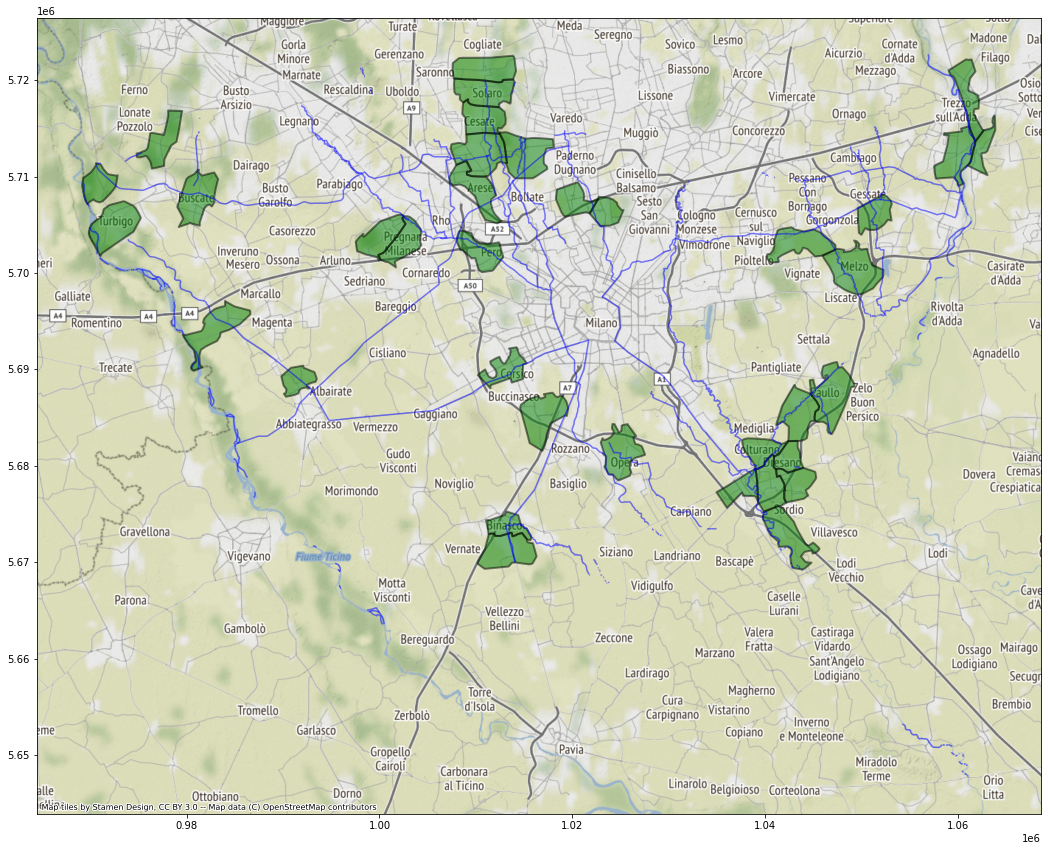

In [ ]:
ax = comuni_parco_acqua.to_crs(epsg=3857).plot(figsize=(18, 18), linewidth=2, facecolor='green', edgecolor='k', alpha=0.5)
corsi_acqua.to_crs(epsg=3857).plot(ax=ax, edgecolor='blue', alpha=0.5)
contextily.add_basemap(ax)

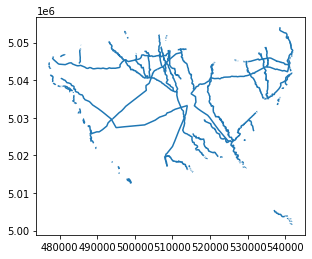

In [ ]:
corsi_acqua.plot()

4. L'elenco dei comuni che si trovano a più di 1 km da un'autostrada: visualizzare il numero, l'elenco e una mappa con in rosso i comuni che si trovano a meno di 1 km e in verde gli altri (vedi immagine allegata)

In [13]:
autostrade = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Autostrade_10000_CT10_line.zip')

In [14]:
comuni_lombardia = comuni[comuni['COD_REG']==3]

In [15]:
comuni_lontano_autostrada = comuni_lombardia[comuni_lombardia.distance(autostrade.unary_union)>1000]
comuni_lontano_autostrada

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1448,1,3,12,0,12,12001,012001,Agra,None,0,6996.108320,294.238907,"POLYGON ((482802.662 5097733.142, 482784.662 5..."
1450,1,3,12,0,12,12003,012003,Angera,None,0,24194.847570,1748.218609,"POLYGON ((470218.756 5071198.335, 470937.656 5..."
1451,1,3,12,0,12,12004,012004,Arcisate,None,0,19072.979574,1229.387510,"POLYGON ((488207.686 5080963.765, 488368.654 5..."
1454,1,3,12,0,12,12007,012007,Azzio,None,0,7602.953671,217.279762,"POLYGON ((477914.331 5082436.678, 477696.259 5..."
1455,1,3,12,0,12,12008,012008,Barasso,None,0,10877.705348,387.266945,"POLYGON ((481124.582 5079579.276, 481862.732 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,1,3,108,0,108,108047,108047,Veduggio con Colzano,None,0,7986.758681,339.055530,"POLYGON ((519686.705 5065270.380, 519754.706 5..."
7738,1,3,108,0,108,108048,108048,Verano Brianza,None,0,9171.724083,366.786214,"POLYGON ((517613.394 5060787.396, 518293.122 5..."
7739,1,3,108,0,108,108049,108049,Villasanta,None,0,9629.121636,464.512162,"POLYGON ((523356.646 5052024.704, 523490.961 5..."
7743,1,3,108,0,108,108053,108053,Cornate d'Adda,None,0,15414.910444,1364.665029,"POLYGON ((537678.573 5057235.438, 537951.570 5..."


In [ ]:
comuni_lontano_autostrada['COMUNE'].count()

1238

In [16]:
comuni_vicino_autostrada = comuni_lombardia[comuni_lombardia.distance(autostrade.unary_union)<1000]
comuni_vicino_autostrada

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1449,1,3,12,0,12,12002,012002,Albizzate,None,0,9255.748026,381.383130,"POLYGON ((485235.221 5064709.066, 485545.361 5..."
1452,1,3,12,0,12,12005,012005,Arsago Seprio,None,0,15318.402658,1053.346459,"POLYGON ((478637.631 5063107.396, 478750.600 5..."
1453,1,3,12,0,12,12006,012006,Azzate,None,0,11761.330818,453.647093,"POLYGON ((483900.127 5071449.880, 484020.211 5..."
1459,1,3,12,0,12,12012,012012,Besnate,None,0,10817.357855,727.389349,"POLYGON ((481260.113 5062375.402, 481568.048 5..."
1470,1,3,12,0,12,12023,012023,Brunello,None,0,5605.506138,172.186855,"POLYGON ((484663.462 5068720.354, 484936.086 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,1,3,108,0,108,108044,108044,Usmate Velate,None,0,14276.627617,971.904364,"POLYGON ((527095.650 5057351.438, 527786.020 5..."
7740,1,3,108,0,108,108050,108050,Vimercate,None,0,24791.429563,2059.252806,"POLYGON ((527733.646 5054237.461, 527716.646 5..."
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,583.474963,"POLYGON ((535742.586 5052473.474, 535839.585 5..."
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,480.779355,"POLYGON ((530927.622 5047008.514, 530890.358 5..."


In [ ]:
comuni_vicino_autostrada['COMUNE'].count()

268

In [ ]:
ax = comuni_lontano_autostrada.to_crs(epsg=3857).plot(figsize=(18, 18), facecolor='green', edgecolor='k', alpha=0.5)
comuni_vicino_autostrada.to_crs(epsg=3857).plot(ax=ax, facecolor='red')
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.

5. L'elenco dei quartieri di Milano attraversati da una autostrada: visualizzare una mappa con i quartieri. Aggiungere anche il nome del quartiere sulla mappa.

In [17]:
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/ds964_nil_wm.zip')

In [ ]:
quartieri_milano.crs

In [ ]:
autostrade.crs

In [18]:
quartieri_autostrada = quartieri_milano[quartieri_milano.intersects(autostrade.to_crs(epsg=4326).unary_union)]
quartieri_autostrada

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
7,76,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96,"POLYGON ((9.13481 45.52095, 9.13481 45.52094, ..."
11,62,QUINTO ROMANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6962.785127,1.645797e+06,100,"POLYGON ((9.08375 45.48485, 9.08444 45.48459, ..."
16,43,TIBALDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3964.077498,7.861846e+05,105,"POLYGON ((9.18775 45.43732, 9.18644 45.43733, ..."
22,75,STEPHENSON,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3582.570059,5.600844e+05,111,"POLYGON ((9.13009 45.50820, 9.13016 45.50784, ..."
23,47,CANTALUPA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5161.415348,9.266817e+05,112,"POLYGON ((9.16112 45.42589, 9.16270 45.42544, ..."
26,46,BARONA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6836.011433,2.006249e+06,115,"POLYGON ((9.16112 45.42589, 9.16056 45.42605, ..."
27,71,VILLAPIZZONE - CAGNOLA - BOLDINASCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8375.003494,3.426941e+06,116,"POLYGON ((9.16204 45.49690, 9.16012 45.49570, ..."
28,88,PARCO BOSCO IN CITTA',05/02/2020,Vigente,Milano 2030 - PGT Approvato,37072.981211,7.834006e+06,117,"POLYGON ((9.07309 45.50604, 9.07326 45.50589, ..."
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((9.26378 45.43251, 9.26384 45.43248, ..."


In [ ]:
ax = quartieri_autostrada.to_crs(epsg=3857).plot(figsize=(18, 18), facecolor='green', edgecolor='k', alpha=0.5)
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
quartieri_attraversati = quartieri_milano[quartieri_milano.intersects(autostrade.to_crs(epsg=4326).unary_union)]
quartieri_attraversati

In [ ]:
quartieri_attra_copy = quartieri_attraversati.copy()
quartieri_attra_copy.crs

In [ ]:
quartieri_attra_copy.to_crs(epsg=3857, inplace=True)
quartieri_attra_copy.crs

In [ ]:
quartieri_attra_copy["coordinate"] = quartieri_attra_copy["geometry"].apply(lambda x: x.representative_point().coords[:])
quartieri_attra_copy

In [24]:
quartieri_attra_copy["coordinate"] = [coords[0] for coords in quartieri_attra_copy["coordinate"]]
quartieri_attra_copy

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,coordinate
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((1011198.900 5698176.961, 1011092.872...","(1010190.3166120737, 5699170.107388781)"
7,76,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96,"POLYGON ((1016882.080 5703910.058, 1016882.269...","(1017094.5514039886, 5702812.006293386)"
11,62,QUINTO ROMANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6962.785127,1.645797e+06,100,"POLYGON ((1011198.900 5698176.961, 1011275.272...","(1011931.3653679857, 5697205.933701251)"
16,43,TIBALDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3964.077498,7.861846e+05,105,"POLYGON ((1022775.669 5690633.479, 1022629.490...","(1021932.3896148928, 5691265.104399953)"
22,75,STEPHENSON,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3582.570059,5.600844e+05,111,"POLYGON ((1016356.796 5701884.818, 1016364.997...","(1015519.3120330912, 5702392.288544547)"
23,47,CANTALUPA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5161.415348,9.266817e+05,112,"POLYGON ((1019811.544 5688820.411, 1019987.008...","(1019507.060942286, 5688255.308215838)"
26,46,BARONA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6836.011433,2.006249e+06,115,"POLYGON ((1019811.544 5688820.411, 1019748.373...","(1018972.580493863, 5689586.905076373)"
27,71,VILLAPIZZONE - CAGNOLA - BOLDINASCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8375.003494,3.426941e+06,116,"POLYGON ((1019913.357 5700090.572, 1019700.177...","(1018097.9778729774, 5700154.179582881)"
28,88,PARCO BOSCO IN CITTA',05/02/2020,Vigente,Milano 2030 - PGT Approvato,37072.981211,7.834006e+06,117,"POLYGON ((1010011.828 5701541.489, 1010030.324...","(1012906.0649844063, 5697951.58522605)"
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((1031239.542 5689869.559, 1031245.576...","(1029450.2595839831, 5689065.327990683)"


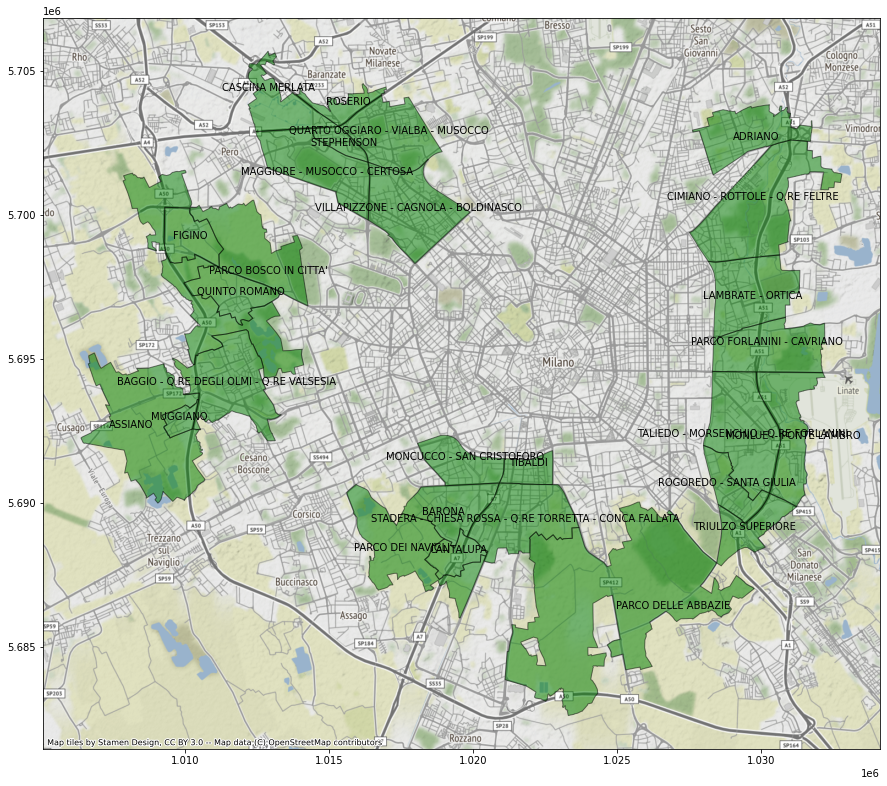

In [25]:
ax = quartieri_attraversati.to_crs(epsg=3857).plot(figsize=(15, 15), facecolor="g", alpha=0.5, edgecolor="k")
contextily.add_basemap(ax=ax)

for idx, row in quartieri_attra_copy.iterrows():
   plt.annotate(s=row["NIL"], xy=row["coordinate"], horizontalalignment="center", color="k")